# Import Libraries and load the datset Mnist digit

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(" MNIST dataset loaded successfully from the web.\n")

print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}\n")

print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Normalize pixel values (0-255 → 0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Add channel dimension (needed for CNN: (28,28,1))
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
 MNIST dataset loaded successfully from the web.

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


# Visualize the Class Distribution

/tmp/ipython-input-3698399419.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique, y=counts, palette="viridis")


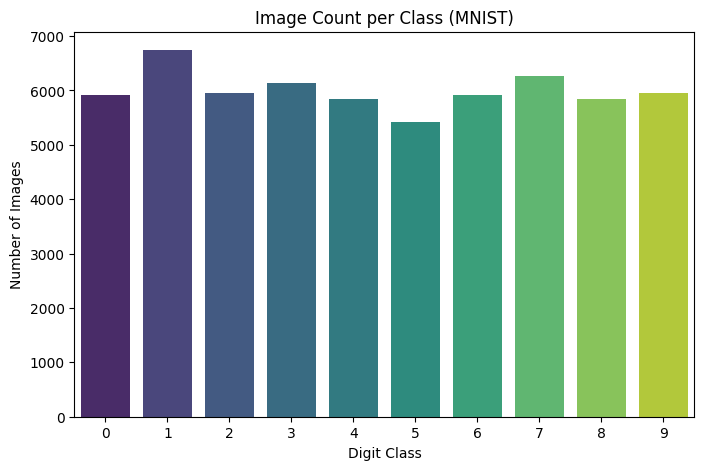

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Count how many samples per class in training set
unique, counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(8,5))
sns.barplot(x=unique, y=counts, palette="viridis")
plt.title("Image Count per Class (MNIST)")
plt.xlabel("Digit Class")
plt.ylabel("Number of Images")
plt.show()


# Show one sample per class

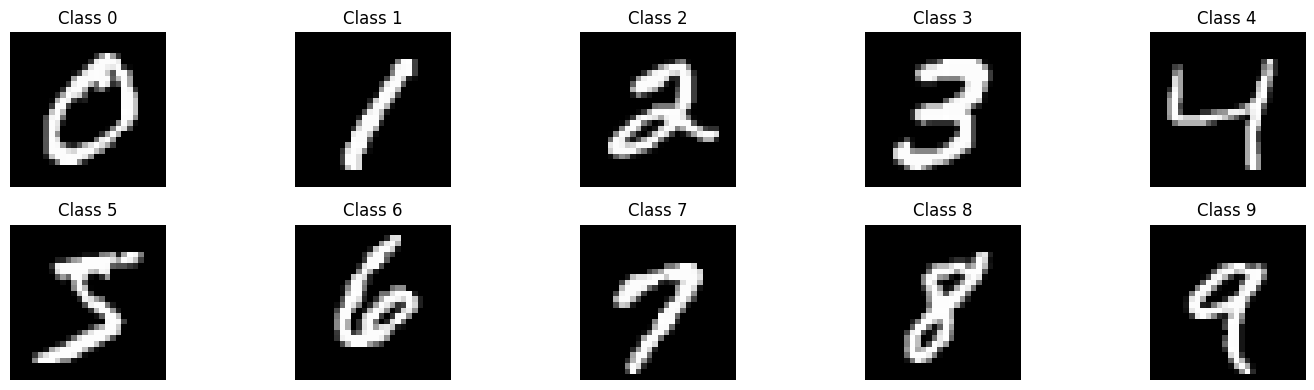

In [3]:
import matplotlib.pyplot as plt
import numpy as np

classes = np.unique(y_train)  # digits 0–9

plt.figure(figsize=(15, 4))

for i, c in enumerate(classes):
    # Find the first index of this class
    idx = np.where(y_train == c)[0][0]

    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[idx].reshape(28,28), cmap="gray")
    plt.title(f"Class {c}")
    plt.axis("off")

plt.tight_layout()
plt.show()


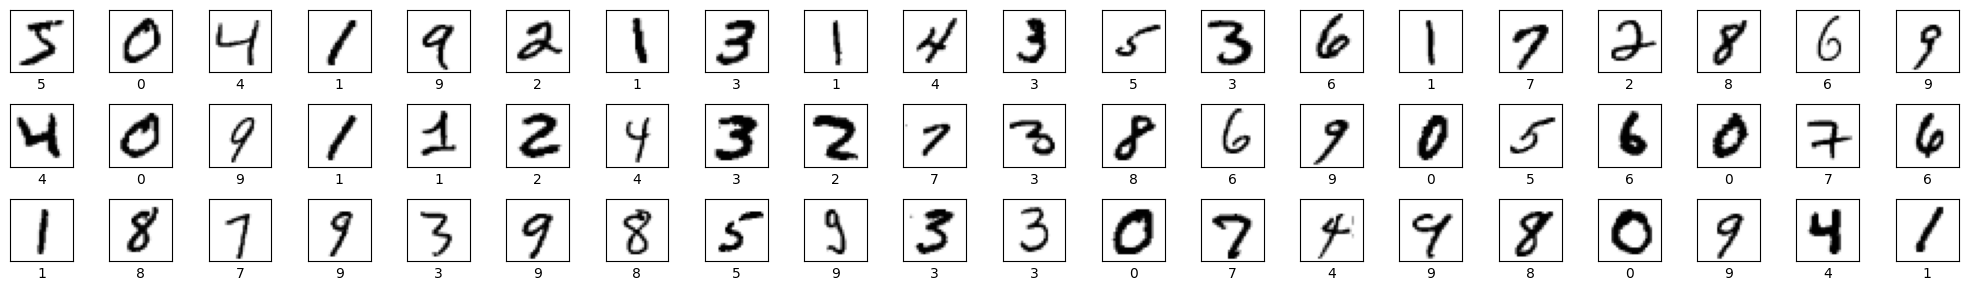

In [4]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)

        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()


# Data Generator

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Parameters
IMG_SIZE = 28
BATCH_SIZE = 32

# Reshape x_train and x_test to add channel dimension
x_train_exp = x_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_test_exp = x_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Convert y_train and y_test to categorical
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=10)

# ImageDataGenerator with rescaling
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_batches = datagen.flow(
    x_train_exp, y_train_cat,
    batch_size=BATCH_SIZE,
    subset='training',
    shuffle=True
)

valid_batches = datagen.flow(
    x_train_exp, y_train_cat,
    batch_size=BATCH_SIZE,
    subset='validation'
)

# Check number of samples
print("Train samples:", train_batches.n)
print("Validation samples:", valid_batches.n)



Train samples: 48000
Validation samples: 12000


# Plotting the train and validation sample in graph

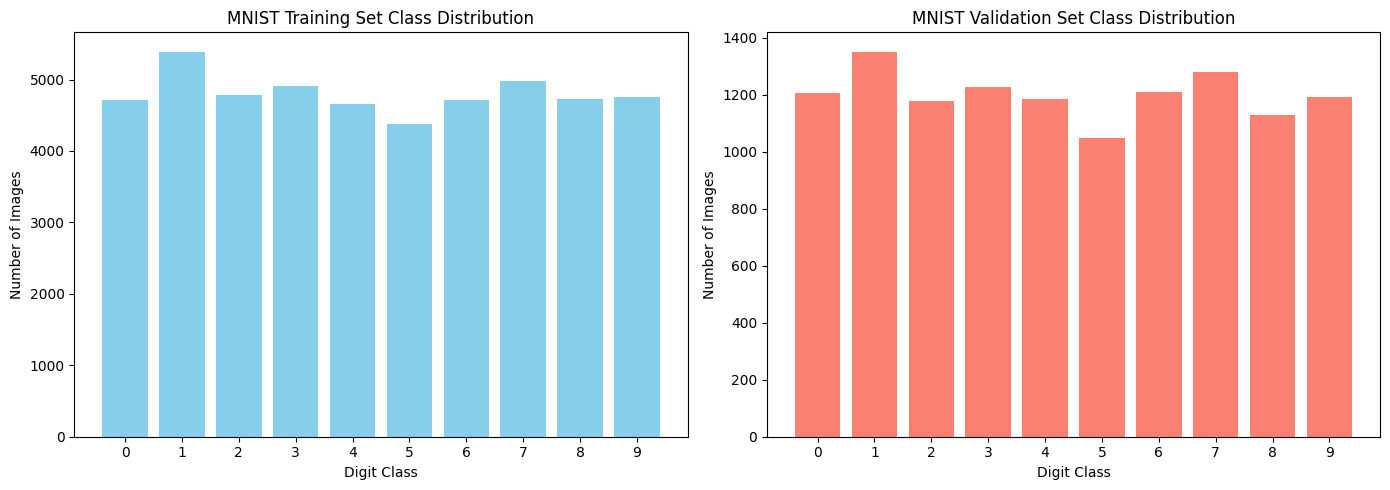

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Split data for training and validation
val_split = 0.2
num_val = int(len(x_train) * val_split)

# Training set
x_train_subset = x_train[num_val:]
y_train_subset = y_train[num_val:]

# Validation set
x_val = x_train[:num_val]
y_val = y_train[:num_val]

# Count samples per class
train_unique, train_counts = np.unique(y_train_subset, return_counts=True)
val_unique, val_counts = np.unique(y_val, return_counts=True)

# Plotting
plt.figure(figsize=(14,5))

# Training set
plt.subplot(1,2,1)
plt.bar(train_unique, train_counts, color='skyblue')
plt.xlabel("Digit Class")
plt.ylabel("Number of Images")
plt.title("MNIST Training Set Class Distribution")
plt.xticks(train_unique)

# Validation set
plt.subplot(1,2,2)
plt.bar(val_unique, val_counts, color='salmon')
plt.xlabel("Digit Class")
plt.ylabel("Number of Images")
plt.title("MNIST Validation Set Class Distribution")
plt.xticks(val_unique)

plt.tight_layout()
plt.show()




# Building the Model using CNN

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

# Parameters
IMG_ROWS, IMG_COLS = 28, 28
NUM_CLASSES = 10

# Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape to (28,28,1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, NUM_CLASSES)
y_test_cat = to_categorical(y_test, NUM_CLASSES)

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_ROWS, IMG_COLS, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [8]:
# Parameters
EPOCHS = 8
BATCH_SIZE = 64

# Train the CNN model
history = model.fit(
    x_train, y_train_cat,
    validation_data=(x_test, y_test_cat),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)



Epoch 1/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8334 - loss: 0.5356 - val_accuracy: 0.9819 - val_loss: 0.0578
Epoch 2/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9703 - loss: 0.0991 - val_accuracy: 0.9873 - val_loss: 0.0404
Epoch 3/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9790 - loss: 0.0723 - val_accuracy: 0.9898 - val_loss: 0.0308
Epoch 4/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9847 - loss: 0.0554 - val_accuracy: 0.9898 - val_loss: 0.0290
Epoch 5/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9855 - loss: 0.0479 - val_accuracy: 0.9901 - val_loss: 0.0301
Epoch 6/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9878 - loss: 0.0399 - val_accuracy: 0.9915 - val_loss: 0.0241
Epoch 7/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9895 - loss: 0.0344 - val_accuracy: 0.9916 - val_loss: 0.0218
Epoch 8/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9907 - loss: 0.0290 - val_accuracy: 0.9909 - 

#  Ploting the Training History

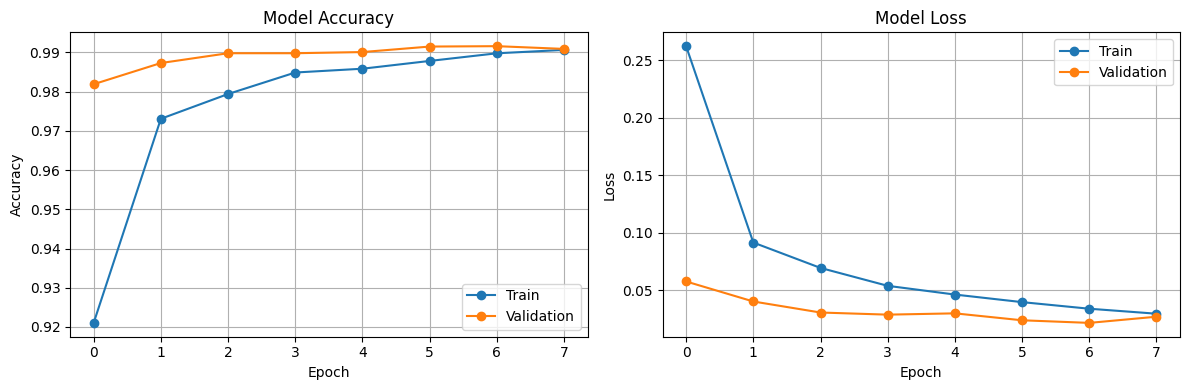

In [9]:
import matplotlib.pyplot as plt

# Plot Training History
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], marker='o', label='Train')
plt.plot(history.history['val_accuracy'], marker='o', label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], marker='o', label='Train')
plt.plot(history.history['val_loss'], marker='o', label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# Save the training model

In [10]:
from google.colab import files

model.save("mnist_cnn_model.keras")

files.download("mnist_cnn_model.keras")

print("Model loaded successfully!")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model loaded successfully!
